## 1. TV, Halftime Shows, and the Big Game

Apakah Anda suka sepakbola atau tidak, Super Bowl adalah tontonan. Ada drama dalam bentuk ledakan, serangan balik, dan kontroversi dalam permainan itu sendiri. Ada iklan-iklan yang sangat mahal, ada yang lucu, ada yang menyayat hati, memprovokasi, dan aneh. Pertunjukan paruh waktu dengan musisi terbesar di dunia, kadang-kadang [mengendarai harimau mekanik raksasa](https://youtu.be/ZD1QrIe--_Y?t=14) atau [melompat dari atap stadion](https://youtu.be/mjrdywp5nyE?t=62). Dan dalam proyek ini, Anda akan mengetahui bagaimana beberapa elemen dari acara ini berinteraksi satu sama lain. Anda akan menjawab pertanyaan seperti:

* Apa hasil gim paling ekstrem?
* Bagaimana permainan mempengaruhi pemirsa televisi?
* Bagaimana perkembangan pemirsa, peringkat TV, dan biaya iklan dari waktu ke waktu?
* Siapa musisi paling produktif dalam hal pertunjukan pada pertunjukan di babak pertama?

<p><img src="https://assets.datacamp.com/production/project_684/img/left_shark.jpg" alt="Left Shark Steals The Show">
<em><a href="https://www.flickr.com/photos/huntleypaton/16464994135/in/photostream/">Left Shark Steals The Show</a>. Katy Perry performing at halftime of Super Bowl XLIX. Photo by Huntley Paton. Attribution-ShareAlike 2.0 Generic (CC BY-SA 2.0).</em></p>

Dataset yang kami gunakan merupakan hasil [web scraped](https://en.wikipedia.org/wiki/Web_scraping) dan dipoles dari Wikipedia. Ini terdiri dari tiga file CSV, satu dengan [data game](https://en.wikipedia.org/wiki/List_of_Super_Bowl_champions), satu dengan [data TV](https://en.wikipedia.org/wiki/Super_Bowl_television_ratings), dan satu dengan [data musisi paruh waktu ](https://en.wikipedia.org/wiki/List_of_Super_Bowl_halftime_shows)untuk semua 52 Super Bowl hingga 2018. Mari kita lihat, menggunakan `display()` alih-alih `print()` karena hasilnya jauh lebih cantik di Jupyter Notebooks.

In [1]:
# Import pandas
import pandas as pd

# Load the CSV data into DataFrames
super_bowls = pd.read_csv('datasets/super_bowls.csv')
tv = pd.read_csv('datasets/tv.csv')
halftime_musicians = pd.read_csv('datasets/halftime_musicians.csv')

# Display the first five rows of each DataFrame
display(super_bowls.head())
display(tv.head())
display(halftime_musicians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


## 2. Mencatat masalah dataset

Untuk data game Super Bowl, kita dapat melihat dataset tampak utuh kecuali untuk nilai yang hilang di kolom quarterback cadangan (`qb_winner_2` dan `qb_loser_2`), yang masuk akal mengingat QB awal paling banyak di Super Bowl (`qb_winner_1` dan `qb_loser_1`) memainkan seluruh permainan.

Dari inspeksi visual data TV dan musisi paruh waktu, hanya ada satu nilai yang hilang ditampilkan, tetapi saya punya firasat ada lebih banyak. Super Bowl kembali ke tahun 1967, dan kolom yang lebih terperinci (mis. Jumlah lagu untuk musisi paruh waktu) mungkin tidak dilacak dengan andal seiring waktu. Wikipedia itu bagus tapi tidak sempurna.

Pemeriksaan output `.info()` untuk `tv` dan `halftime_musicians` menunjukkan kepada kita bahwa ada beberapa kolom dengan nilai `null`.

In [2]:
# Summary of the TV data to inspect
tv.info()

print('\n')

# Summary of the halftime musician data to inspect
halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
super_bowl          53 non-null int64
network             53 non-null object
avg_us_viewers      53 non-null int64
total_us_viewers    15 non-null float64
rating_household    53 non-null float64
share_household     53 non-null int64
rating_18_49        15 non-null float64
share_18_49         6 non-null float64
ad_cost             53 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
super_bowl    134 non-null int64
musician      134 non-null object
num_songs     88 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


## 3. Distribusi poin gabungan

Untuk data TV, kolom berikut memiliki nilai yang hilang dan banyak di antaranya :

* `total_us_viewers` (jumlah pemirsa A.S. yang menonton setidaknya beberapa bagian dari siaran)
* `rating_18_49` (rata-rata % dari orang dewasa A.S. 18-49 yang tinggal di rumah tangga dengan TV yang menonton seluruh siaran)
* `share_18_49` (rata-rata % dari orang dewasa A.S. 18-49 yang tinggal di rumah tangga dengan TV yang digunakan menonton seluruh siaran)

Untuk data musisi babak pertama, ada sejumlah lagu yang hilang yang ditampilkan (`num_songs`) sekitar sepertiga dari pertunjukan.

Ada banyak alasan potensial untuk nilai-nilai yang hilang ini. Apakah data pernah dilacak? Apakah itu hilang dalam sejarah? Apakah upaya penelitian untuk membuat seluruh data ini layak? Mungkin. Menyaksikan setiap pertunjukkan paruh waktu Super Bowl untuk mendapatkan jumlah lagu akan sangat menyenangkan. Tapi kita tidak punya waktu untuk melakukan hal-hal seperti itu sekarang! Mari kita catat di mana dataset tidak sempurna dan mulai mengungkap beberapa wawasan.

Mari kita mulai dengan melihat poin gabungan untuk setiap Super Bowl dengan memvisualisasikan distribusi. Mari kita juga menunjukkan Super Bowl dengan skor tertinggi dan terendah.

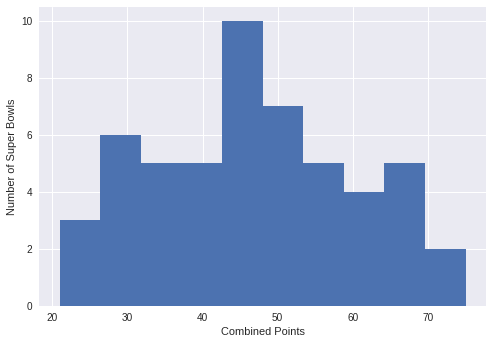

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [3]:
# Import matplotlib and set plotting style
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

# Plot a histogram of combined points
plt.hist(super_bowls['combined_pts'])
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the Super Bowls with the highest and lowest combined scores
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25])

## 4. Perbedaan poin distribusi

Sebagian besar skor gabungan adalah sekitar 40-50 poin, dengan jarak ekstrem yang kira-kira sama jauhnya dalam arah yang berlawanan. Naik ke skor gabungan tertinggi di 74 dan 75, kami menemukan dua pertandingan yang menampilkan pertunjukan quarterback dominan. Satu bahkan terjadi baru-baru ini di LII Super Bowl 2018 di mana Patriot Tom Brady kalah dari underdog Nick Foles 'Eagles 41-33 untuk skor gabungan 74.

Turun ke skor gabungan terendah, kami memiliki Super Bowl III dan VII, yang menampilkan pertahanan tangguh yang mendominasi. Kami juga memiliki Super Bowl IX di New Orleans pada tahun 1975, yang skor 16-6nya dapat dikaitkan dengan cuaca buruk. Lapangan itu licin karena hujan semalaman, dan cuaca dingin pada suhu 46 ° F (8 ° C), membuatnya sulit bagi Steelers dan Viking untuk melakukan banyak serangan. Ini adalah Super Bowl terdingin kedua yang pernah ada dan yang terakhir dimainkan dalam cuaca buruk selama lebih dari 30 tahun. NFL menyadari orang menyukai poin, saya kira.

*PEMBARUAN: Dalam Super Bowl LIII pada tahun 2019, Patriots dan Rams memecahkan rekor untuk Super Bowl dengan skor terendah dengan skor gabungan 16 poin (13-3 untuk Patriots).*

Mari kita lihat perbedaan poin sekarang.

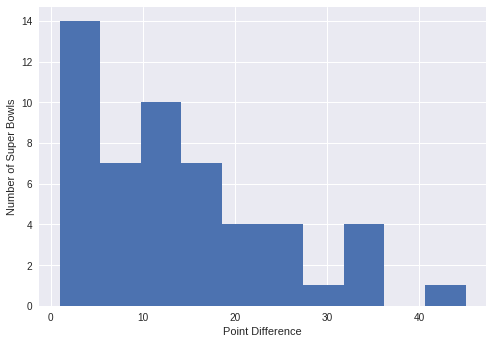

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
32,1986-01-26,20,Louisiana Superdome,New Orleans,Louisiana,73818,Chicago Bears,46,Jim McMahon,NaN,Mike Ditka,New England Patriots,10,Tony Eason,Steve Grogan,Raymond Berry,56,36


In [8]:
# Plot a histogram of point differences
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.show()

# Display the closest game(s) and biggest blowouts
display(super_bowls[super_bowls['difference_pts'] == 1])
display(super_bowls[super_bowls['difference_pts'] >= 35])

## 5. Apakah semarak diterjemahkan ke pemirsa yang hilang?

Sebagian besar Super Bowls adalah permainan dekat. Masuk akal. Kedua tim cenderung layak jika mereka sejauh ini. Pertandingan terdekat yang pernah terjadi adalah ketika Buffalo Bills kalah dari New York Giants dengan 1 poin pada tahun 1991, yang paling diingat untuk upaya sasaran lapangan terjawab Scott Norwood detik terakhir [yang melebar](https://www.youtube.com/watch?v=RPFZCGgjDSg), melepaskan empat kerugian Super Bowl berturut-turut . Scott yang malang. Perbedaan poin terbesar yang pernah ada adalah 45 poin (!) Di mana Hall of Famer Joe Montana membuat San Francisco 49ers meraih kemenangan pada tahun 1990, satu tahun sebelum pertandingan terdekat.

Saya ingat menonton Seahawks menghancurkan Broncos dengan 35 poin (43-8) pada tahun 2014, yang merupakan pengalaman yang membosankan menurut saya. Permainan itu tidak pernah benar-benar dekat. Saya cukup yakin kami mengubah saluran pada akhir kuartal ketiga. Mari kita gabungkan data permainan dan TV kita untuk melihat apakah ini adalah fenomena universal. Apakah perbedaan poin besar diterjemahkan ke pemirsa yang hilang? Kita dapat melakukan plot [pembagian rumah tangga](https://en.wikipedia.org/wiki/Nielsen_ratings) (persentase rata-rata rumah tangga A.S. dengan TV yang digunakan yang menonton seluruh siaran) vs. perbedaan poin untuk mengetahuinya.

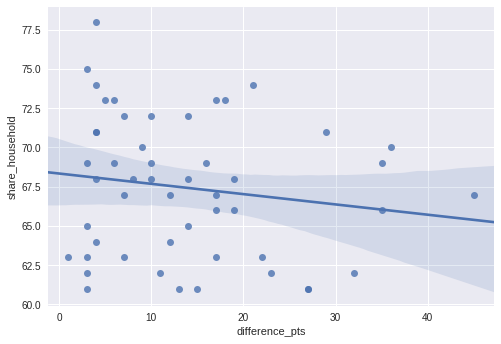

In [7]:
# Join game and TV data, filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

# Import seaborn
import seaborn as sns

# Create a scatter plot with a linear regression model fit
sns.regplot(x=games_tv['difference_pts'], y=games_tv['share_household'], data=games_tv)

## 6. Pemirsa dan industri iklan seiring waktu

Garis regresi yang miring ke bawah dan interval kepercayaan 95% untuk regresi itu menunjukkan bahwa menyerah pada permainan jika terjadi semarak adalah hal biasa. Meskipun sesuai dengan intuisi kita, kita harus membawanya dengan sebutir garam karena hubungan linier dalam data lemah karena ukuran sampel kami yang kecil yaitu 52 pertandingan.

Terlepas dari skornya, saya yakin sebagian besar orang bertahan untuk acara paruh waktu, yang merupakan kabar baik bagi jaringan TV dan pengiklan. Tempat 30 detik harganya cukup [$5 juta](https://www.businessinsider.com/super-bowl-commercials-cost-more-than-eagles-quarterback-earns-2018-1) sekarang, tetapi apakah selalu seperti itu? Dan bagaimanakah jumlah pemirsa dan peringkat rumah tangga cenderung di samping biaya iklan? Kita bisa mencari tahu menggunakan plot garis yang berbagi sumbu x "Super Bowl".

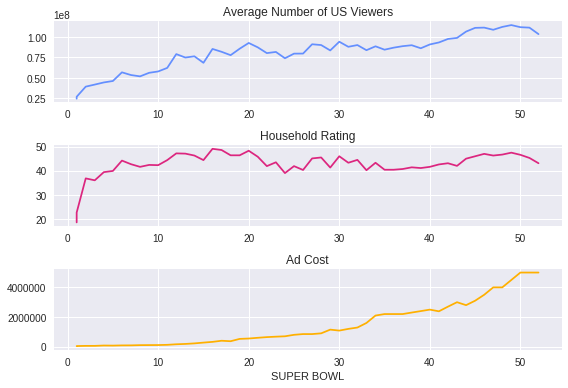

In [9]:
# Create a figure with 3x1 subplot and activate the top subplot
plt.subplot(3, 1, 1)
plt.plot(tv.super_bowl, tv.avg_us_viewers, color='#648FFF')
plt.title('Average Number of US Viewers')

# Activate the middle subplot
plt.subplot(3, 1, 2)
plt.plot(tv.super_bowl, tv.rating_household, color='#DC267F')
plt.title('Household Rating')

# Activate the bottom subplot
plt.subplot(3, 1, 3)
plt.plot(tv.super_bowl, tv.ad_cost, color='#FFB000')
plt.title('Ad Cost')
plt.xlabel('SUPER BOWL')

# Improve the spacing between subplots
plt.tight_layout()

## 7. Pertunjukan babak pertama tidak selalu sebagus ini

Kita dapat melihat pemirsa meningkat sebelum biaya iklan terjadi. Mungkin jaringannya tidak terlalu paham data dan lambat bereaksi? Masuk akal karena DataCamp tidak ada saat itu.

Hipotesis lain: mungkin pertunjukkan paruh waktu tidak begitu bagus di tahun-tahun sebelumnya? Tontonan modern Super Bowl memiliki banyak kaitan dengan prestise budaya tindakan babak pertama yang besar. Saya pergi ke YouTube dan ternyata yang lama tidak memenuhi standar hari ini. Beberapa pelaku:

* [Super Bowl XXVI](https://youtu.be/6wMXHxWO4ns?t=263) pada tahun 1992: A Frosty Rap Snowman dilakukan oleh anak-anak.
* [Super Bowl XXIII](https://www.youtube.com/watch?v=PKQTL1PYSag) pada tahun 1989: Peniru Elvis yang melakukan trik sulap dan bahkan tidak menyanyikan satu lagu Elvis.
* [Super Bowl XXI](https://youtu.be/oSXMNbK2e98?t=436) pada tahun 1987: Ketuk kuda menari. (Oke, itu sebenarnya cukup keren.)

Ternyata kinerja Super Bowl XXVII Michael Jackson, salah satu acara yang paling banyak ditonton dalam sejarah TV Amerika, adalah ketika NFL menyadari nilai airtime Super Bowl dan memutuskan mereka harus menandatangani tindakan nama besar sejak saat itu. Acara turun minum sebelum MJ memang tidak begitu mengesankan, yang bisa kita lihat dengan menyaring data `halftime_musician` kami.

In [11]:
# Display all halftime musicians for Super Bowls up to and including Super Bowl XXVII
halftime_musicians[halftime_musicians.super_bowl <= 27]

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


## 8. Siapa yang paling sering tampil di babak pertama?

Banyak marching band. Klarinet jazz Amerika, Pete Fountain. Miss Texas 1973 memainkan biola. Tidak ada yang melawan pemain itu, mereka hanya bukan [Beyonce](https://www.youtube.com/watch?v=suIg9kTGBVI). Agar adil, tidak ada seorang pun.

Mari kita lihat semua musisi yang telah melakukan lebih dari satu pertunjukan di babak pertama, termasuk jumlah penampilan mereka.

In [13]:
# Count halftime show appearances for each musician and sort them from most to least
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

# Display musicians with more than one halftime show appearance
halftime_appearances[halftime_appearances['super_bowl'] > 1]

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


## 9. Siapa yang membawakan lagu terbanyak dalam pertunjukan turun minum?

[Marching Band Universitas Grambling](https://www.youtube.com/watch?v=RL_3oqpHiDg) yang terkenal di dunia mengambil mahkota dengan enam penampilan. Beyonce, Justin Timberlake, Nelly, dan Bruno Mars adalah satu-satunya musisi pasca-Y2K dengan beberapa penampilan (masing-masing dua).

Dari inspeksi kami sebelumnya, kolom `num_songs` memiliki banyak nilai yang hilang:

* Banyak marching band tidak memiliki entri di `num_songs`.
* Untuk non-marching band, data yang hilang mulai terjadi di Super Bowl XX.

Mari kita memfilter marching band dengan kata `"Marching"` di dalamnya dan kata `"Spirit"` (konvensi penamaan umum untuk marching band adalah *"Spirit of [something]"*). Kemudian kami akan memfilter untuk Super Bowl setelah Super Bowl XX untuk mengatasi masalah data yang hilang, lalu mari kita lihat siapa yang memiliki jumlah lagu paling banyak.

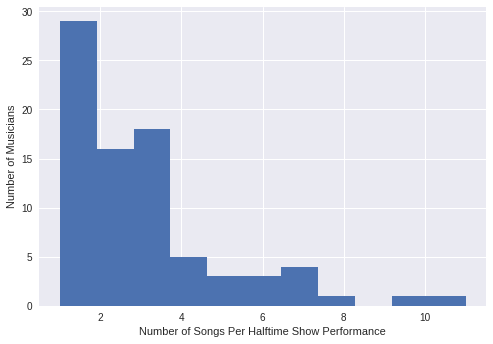

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0
33,41,Prince,7.0
16,47,Beyoncé,7.0
14,48,Bruno Mars,6.0
3,50,Coldplay,6.0
25,45,The Black Eyed Peas,6.0


In [14]:
# Filter out most marching bands
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

# Plot a histogram of number of songs per performance
most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.show()

# Sort the non-band musicians by number of songs per appearance...
no_bands = no_bands.sort_values('num_songs', ascending=False)
# ...and display the top 15
display(no_bands.head(15))

## 10. Kesimpulan

Jadi kebanyakan musisi non-band melakukan 1-3 lagu per pertunjukan di babak pertama. Penting untuk dicatat bahwa durasi acara paruh waktu telah ditentukan (sekitar 12 menit) sehingga lagu per kinerja lebih merupakan ukuran dari berapa banyak lagu hit yang Anda miliki. JT meledak pada 2018, wow. 11 lagu! Diana Ross berada di posisi kedua dengan 10 di medley pada tahun 1996.

Di dalam notebooks ini, kami memuat, membersihkan, kemudian menjelajahi data game Super Bowl, televisi, dan acara paruh waktu. Kami memvisualisasikan distribusi poin gabungan, perbedaan poin, dan pertunjukan paruh waktu menggunakan histogram. Kami menggunakan plot garis untuk melihat bagaimana kenaikan biaya iklan tertinggal dibandingkan dengan peningkatan pemirsa. Dan kami menemukan bahwa semarak (*blowouts*) tampaknya menyebabkan penurunan jumlah penonton.

*UPDATE: [Spoiler alert.](https://en.wikipedia.org/wiki/Super_Bowl_LIII)*

In [15]:
# 2018-2019 conference champions
patriots = 'New England Patriots'
rams = 'Los Angeles Rams'

# Who will win Super Bowl LIII?
super_bowl_LIII_winner = patriots
print('The winner of Super Bowl LIII will be the', super_bowl_LIII_winner)

The winner of Super Bowl LIII will be the New England Patriots
